In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_install = pd.read_csv('installments_payments.csv')
df_train = pd.read_csv('application_train.csv')

In [3]:
df_install

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [4]:
df_install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [5]:
df_install.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample         
SK_ID_CURR: ID of loan in our sample           
NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

NUM_INSTALMENT_NUMBER : On which installment we observe payment (lan tra gop so bao nhieu)

DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application (ngay tra gop)       
DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually (ngay ma khach hang that su tra)    
AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment (luong tien tra gop dang ra khach hang phai tra)     
AMT_PAYMENT: What the client actually paid on previous credit on this installment ( luong tien tra gop ma khach hang that su tra)

In [6]:
df_install.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [7]:
df_install.duplicated().sum()

0

In [8]:
df_install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [9]:
(df_install.isna().sum() / df_install.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [10]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_install)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

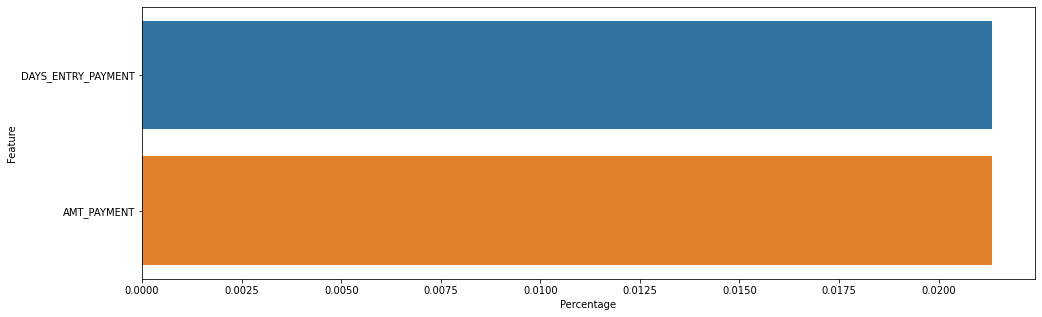

In [11]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

You can see in the chart is that the percentage of missing values for feature AMT_payment and Days_entry_payment is really low, we can drop them and make no impact to the result

In [12]:
df_install.dropna(subset=["AMT_PAYMENT", "DAYS_ENTRY_PAYMENT"], inplace=True)

In [13]:
check_missed_values(df_install)

,Feature,Percentage


After droped there is no missed value left

In [14]:
df_install.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13602496.0,1.903364e+06,536206.564667,1000001.0,1434182.000,1896524.000,2369094.000,2843499.000
SK_ID_CURR,13602496.0,2.784441e+05,102718.470692,100001.0,189639.000,278684.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13602496.0,8.564952e-01,1.031683,0.0,0.000,1.000,1.000,73.000
NUM_INSTALMENT_NUMBER,13602496.0,1.886637e+01,26.661310,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13602496.0,-1.042326e+03,800.945622,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13602496.0,1.705107e+04,50568.662196,0.0,4227.660,8884.710,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


<AxesSubplot:>

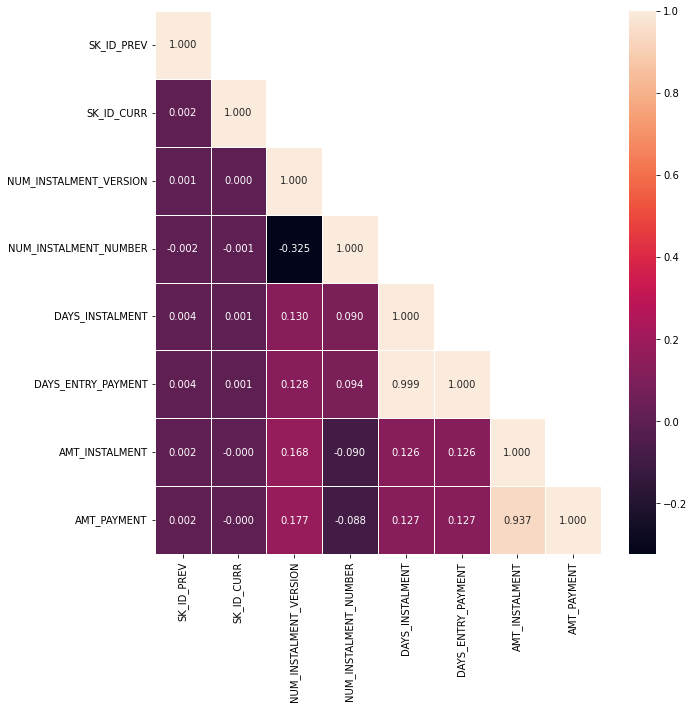

In [15]:
numeric_df = df_install._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [16]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.histplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


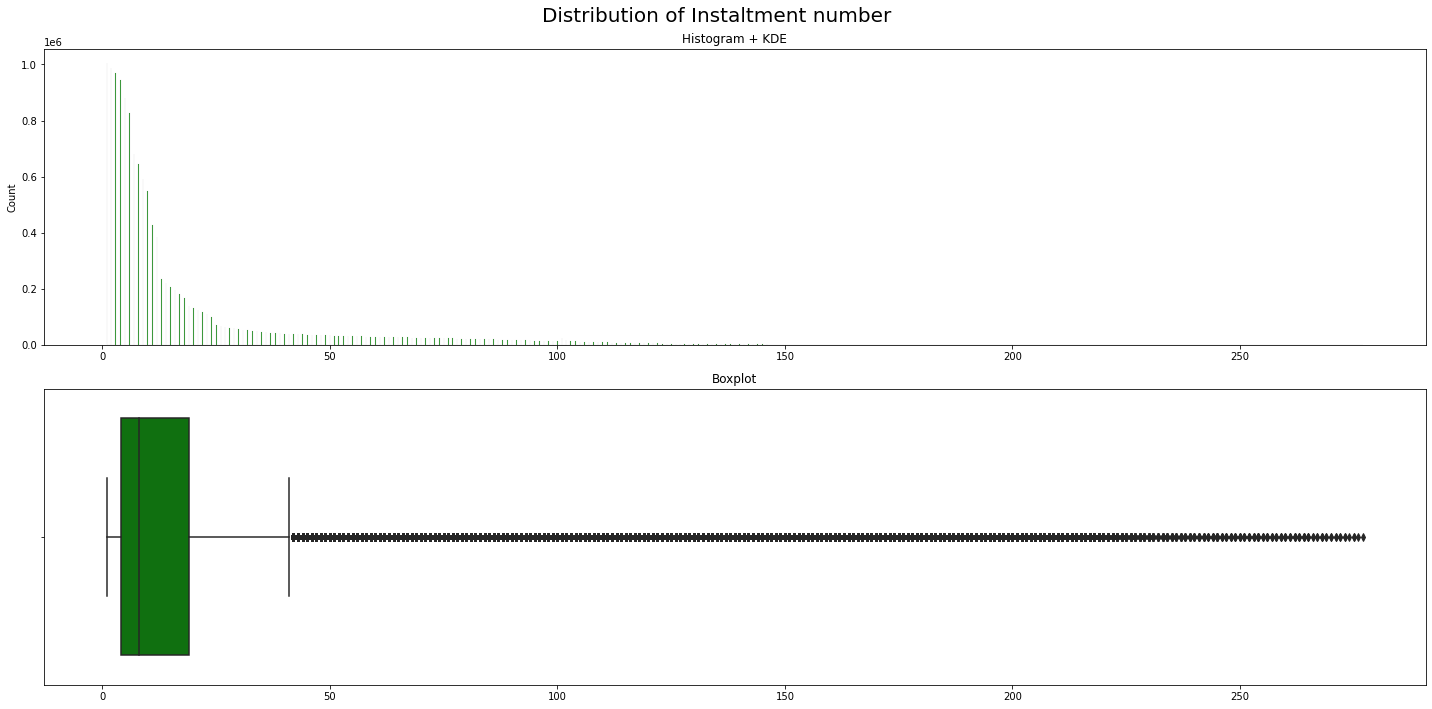

In [17]:
#distribution of "Instaltment number"
draw_distribution(df_install['NUM_INSTALMENT_NUMBER'],'Distribution of Instaltment number',"g")

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


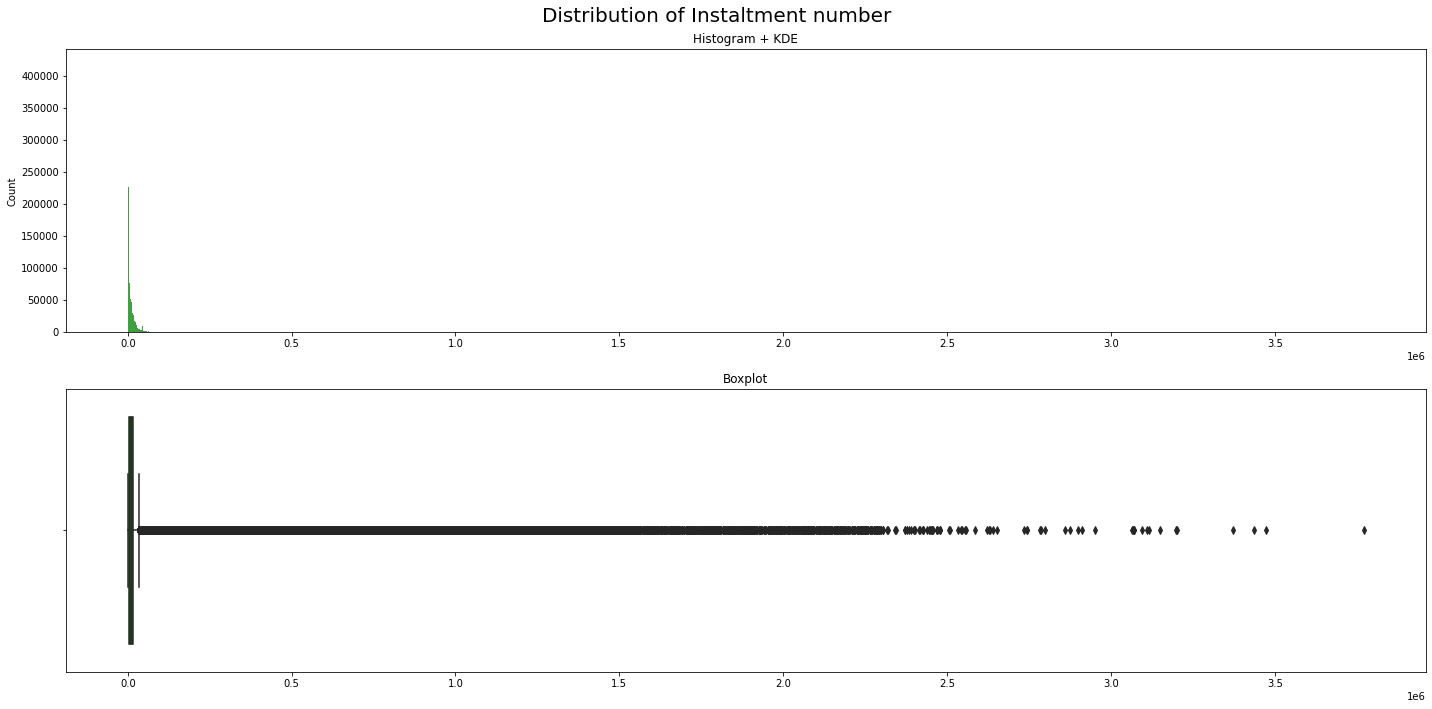

In [18]:
draw_distribution(df_install['AMT_INSTALMENT'],'Distribution of Instaltment number',"g")

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


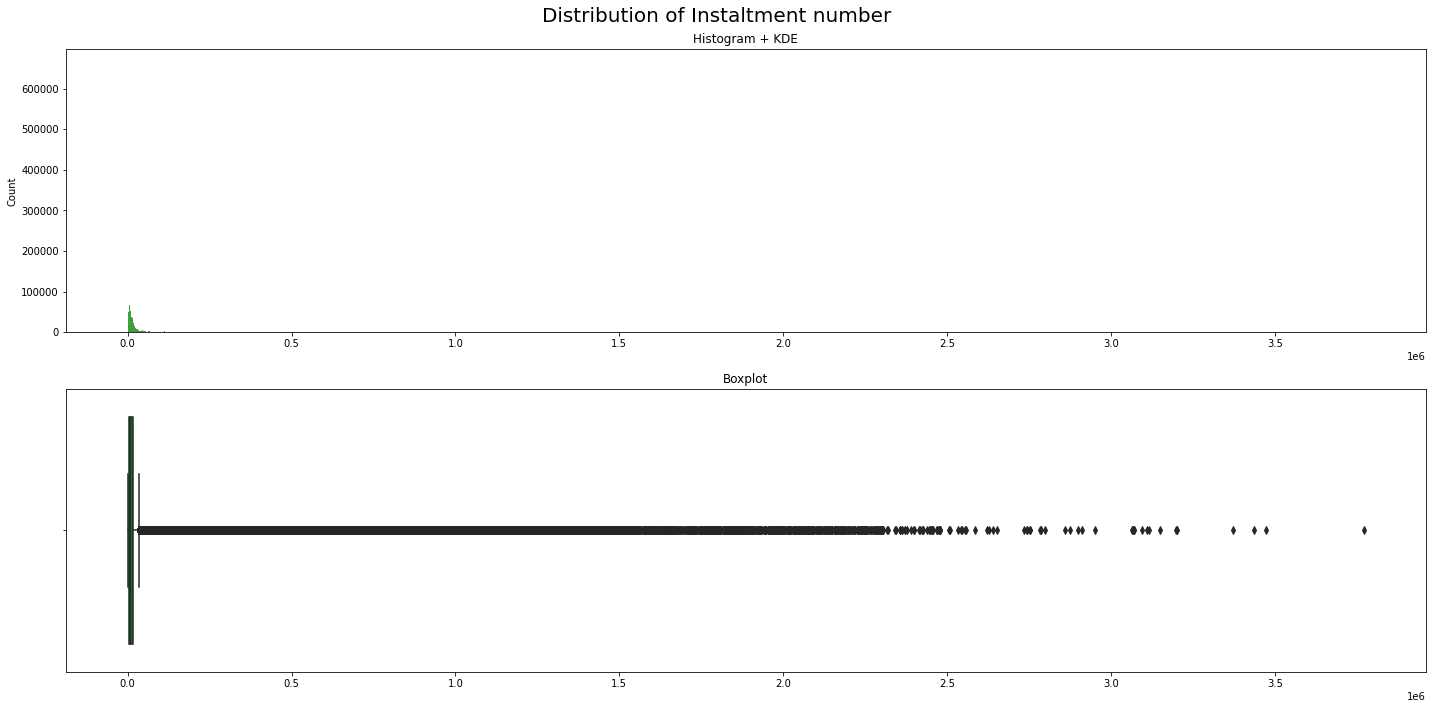

In [19]:
draw_distribution(df_install['AMT_PAYMENT'],'Distribution of Instaltment number',"g")

In [20]:
df_install_dr = df_install.drop(["SK_ID_PREV"], axis = 1)
df_install_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13602496 entries, 0 to 13605348
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
dtypes: float64(5), int64(2)
memory usage: 830.2 MB


In [21]:
df_install_merged = pd.merge(df_train[['SK_ID_CURR','TARGET']], df_install, how = 'left', on=['SK_ID_CURR'])
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11604880,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835
11604881,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690
11604882,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170
11604883,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690


In [22]:
df_install_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,11604885.0,2.785320e+05,102640.035844,100002.0,189719.000,278823.000,367504.000,456255.000
TARGET,11604885.0,7.588279e-02,0.264810,0.0,0.000,0.000,0.000,1.000
SK_ID_PREV,11589009.0,1.903552e+06,536235.005261,1000001.0,1434515.000,1896643.000,2369256.000,2843499.000
NUM_INSTALMENT_VERSION,11589009.0,8.508428e-01,0.999895,0.0,0.000,1.000,1.000,52.000
NUM_INSTALMENT_NUMBER,11589009.0,1.872552e+01,26.487951,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,11589009.0,-1.041140e+03,799.479577,-2922.0,-1654.000,-820.000,-359.000,-1.000
DAYS_ENTRY_PAYMENT,11589009.0,-1.049898e+03,799.078975,-4921.0,-1663.000,-829.000,-368.000,-1.000
AMT_INSTALMENT,11589009.0,1.691812e+04,50330.286659,0.0,4205.250,8788.815,16555.590,3771487.845
AMT_PAYMENT,11589009.0,1.707693e+04,54456.281887,0.0,3378.375,8095.410,15931.935,3771487.845


c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_VERSION'>

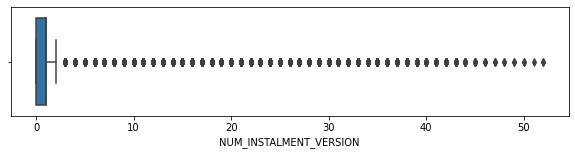

In [23]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_VERSION"])

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER'>

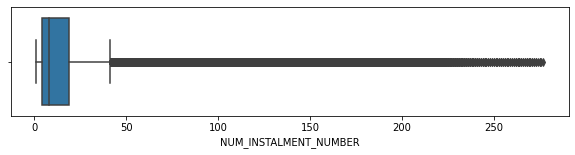

In [24]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_NUMBER"])

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INSTALMENT'>

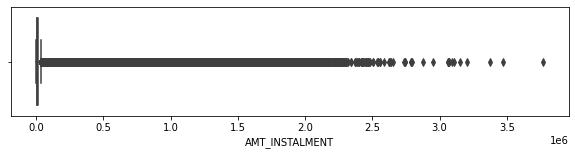

In [25]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_INSTALMENT"])

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_PAYMENT'>

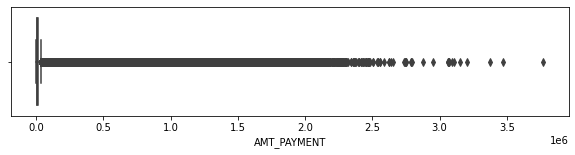

In [26]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_PAYMENT"])

# Biến Categorical

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_VERSION', ylabel='count'>

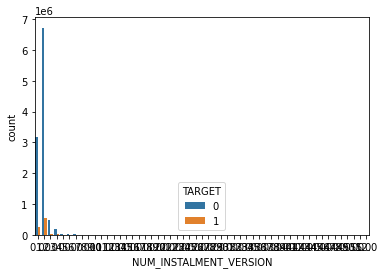

In [27]:
sns.countplot(df_install_merged["NUM_INSTALMENT_VERSION"], hue= df_install_merged["TARGET"])

array([[<AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'DAYS_ENTRY_PAYMENT'}>]],
      dtype=object)

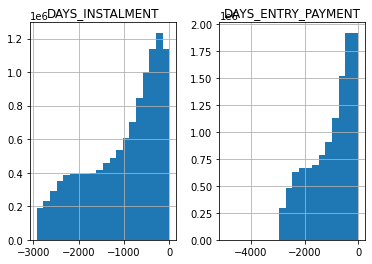

In [28]:
df_install_merged.iloc[:,5:7].hist(bins=20)

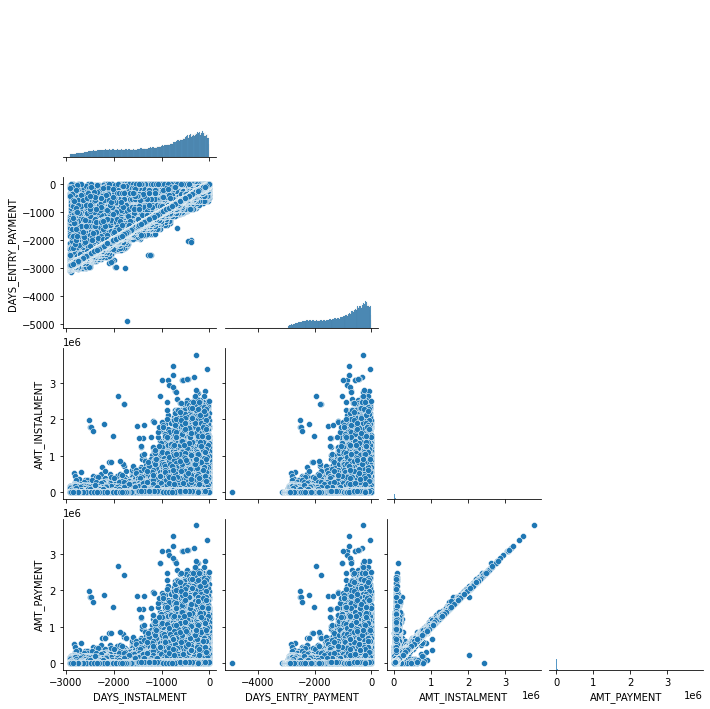

In [29]:
sns.pairplot(df_install_merged.iloc[:,5:9], corner=True)

In [30]:
df_install_merged[["SK_ID_CURR","DAYS_INSTALMENT","DAYS_ENTRY_PAYMENT"]]

,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100002,-115.0,-133.0
1,100002,-355.0,-375.0
2,100002,-25.0,-49.0
3,100002,-235.0,-250.0
4,100002,-325.0,-344.0
...,...,...,...
11604880,456255,-780.0,-781.0
11604881,456255,-606.0,-613.0
11604882,456255,-245.0,-243.0
11604883,456255,-426.0,-435.0


In [31]:
def convert_month(day_to_month):
    day_to_month_1 = day_to_month/30 
    return day_to_month_1
df_install_merged['DAYS_INSTALMENT'] =  df_install_merged['DAYS_INSTALMENT'].apply(convert_month)
df_install_merged['DAYS_ENTRY_PAYMENT'] = df_install_merged['DAYS_ENTRY_PAYMENT'].apply(convert_month)

In [32]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-3.833333,-4.433333,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-11.833333,-12.500000,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-0.833333,-1.633333,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-7.833333,-8.333333,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-10.833333,-11.466667,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11604880,456255,0,1743609.0,1.0,7.0,-26.000000,-26.033333,11090.835,11090.835
11604881,456255,0,2631384.0,3.0,6.0,-20.200000,-20.433333,27489.690,27489.690
11604882,456255,0,1359084.0,1.0,7.0,-8.166667,-8.100000,11314.170,11314.170
11604883,456255,0,2631384.0,3.0,12.0,-14.200000,-14.500000,27489.690,27489.690


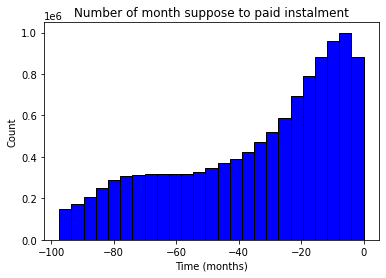

In [33]:
plt.hist(df_install_merged['DAYS_INSTALMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month suppose to paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');

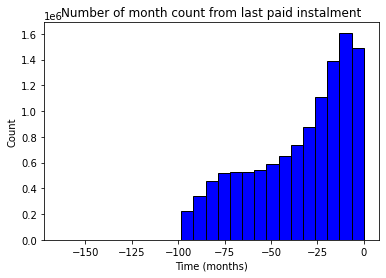

In [34]:
plt.hist(df_install_merged['DAYS_ENTRY_PAYMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month count from last paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');